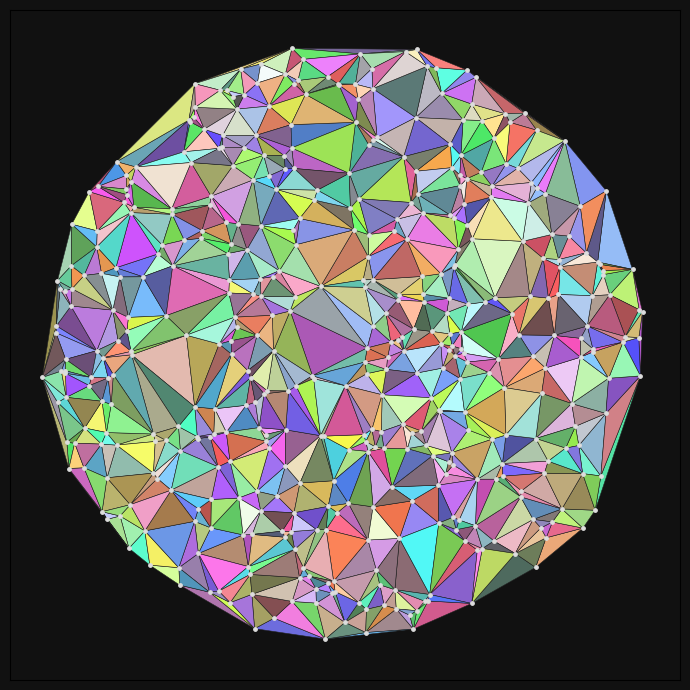

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# -----------------------------
# 1. 生成圆域内的采样点
# -----------------------------
def sample_points_in_disk(n_points=400, radius=1.0, seed=0):
    rng = np.random.default_rng(seed)
    # 极坐标采样：r^{1/2} 保证接近均匀
    r = radius * np.sqrt(rng.random(n_points))
    theta = 2 * np.pi * rng.random(n_points)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return np.vstack([x, y]).T

points = sample_points_in_disk(n_points=450, radius=1.0, seed=42)

# -----------------------------
# 2. Delaunay 三角剖分
# -----------------------------
tri = Delaunay(points)
triangles = tri.simplices   # (n_tri, 3) 顶点索引

# 只保留「圆内部」的三角形（按质心过滤）
centroids = points[triangles].mean(axis=1)
mask = np.linalg.norm(centroids, axis=1) <= 1.0
triangles = triangles[mask]

# -----------------------------
# 3. 可视化
# -----------------------------
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_aspect("equal")
ax.set_facecolor("#111111")        # 深灰 / 近黑背景
fig.patch.set_facecolor("#111111")

# 三角形面片着色
# 随机给每个三角形一个颜色（你也可以根据位置/面积着色）
rng = np.random.default_rng(123)
colors = rng.random((len(triangles), 3)) * 0.7 + 0.3  # 稍微亮一点

for tri_idx, col in zip(triangles, colors):
    tri_coords = points[tri_idx]
    poly = plt.Polygon(tri_coords, closed=True,
                       facecolor=col,
                       edgecolor="#222222",
                       linewidth=0.4)
    ax.add_patch(poly)

# 画点（可选）
ax.scatter(points[:, 0], points[:, 1],
           s=6, c="#dddddd", zorder=3)

# 去掉坐标轴
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)

plt.tight_layout()
plt.show()

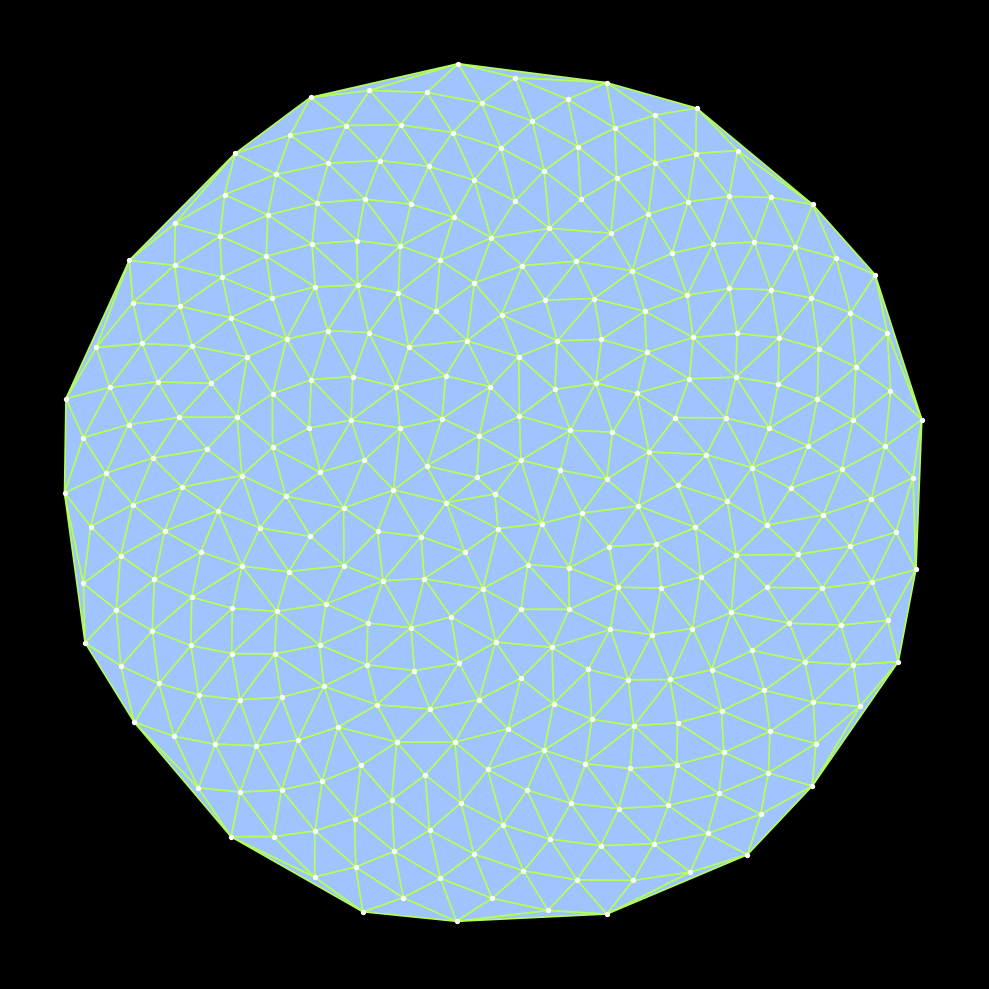

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay

# -----------------------------
# 1. Generate points in a circle (fibonacci spiral for even distribution)
# -----------------------------
n_points = 320  # adjust for density

# Fibonacci (golden angle) spiral - gives beautiful uniform circular distribution
golden_angle = np.pi * (3 - np.sqrt(5))
theta = golden_angle * np.arange(n_points)

# Radius increases toward the edge
radius = np.sqrt(np.arange(n_points) / float(n_points))

x = radius * np.cos(theta)
y = radius * np.sin(theta)

points = np.column_stack((x, y))

# Add the center point explicitly (optional, improves aesthetics)
points = np.vstack(([0, 0], points))

# -----------------------------
# 2. Compute Delaunay triangulation
# -----------------------------
tri = Delaunay(points)

# -----------------------------
# 3. Plot it exactly like your image
# -----------------------------
plt.figure(figsize=(10, 10), facecolor='black')
ax = plt.gca()
ax.set_facecolor('black')
ax.axis('off')
ax.set_aspect('equal')

# Triangle face color (light blue)
face_color = "#a0c4ff"   # soft blue
# Edge color (lime green)
edge_color = "#b2ff59"   # bright lime green

# Plot every triangle
for simplex in tri.simplices:
    triangle = points[simplex]
    # Fill triangle
    plt.fill(triangle[:, 0], triangle[:, 1],
             color=face_color, edgecolor=edge_color, linewidth=1.2)

# Optional: plot vertices as tiny white dots (like in your image)
plt.scatter(points[:, 0], points[:, 1], c='white', s=8, zorder=5)

plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

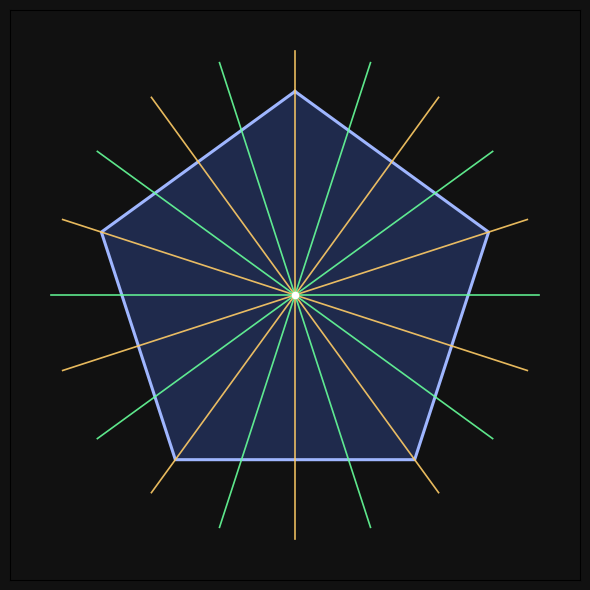

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 参数
# -----------------------------
R = 1.0          # 外接圆半径
n_rays = 20      # 360 / 18 = 20 条射线
ray_len = 1.2    # 射线长度，稍微大于五边形

# -----------------------------
# 1. 正五边形顶点
# -----------------------------
# 让一个顶点在正上方（90°），然后每隔 72°
angles_pent = np.deg2rad(90 + np.arange(5) * 72)
pent_x = R * np.cos(angles_pent)
pent_y = R * np.sin(angles_pent)

# -----------------------------
# 2. 18° 间隔的射线
# -----------------------------
angles_rays_deg = np.arange(0, 360, 18)        # 0, 18, 36, ..., 342
angles_rays = np.deg2rad(angles_rays_deg)

# 计算射线末端坐标
ray_x = ray_len * np.cos(angles_rays)
ray_y = ray_len * np.sin(angles_rays)

# -----------------------------
# 3. 绘图
# -----------------------------
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_aspect("equal")
ax.set_facecolor("#111111")
fig.patch.set_facecolor("#111111")

# (a) 正五边形轮廓 + 填充
ax.fill(pent_x, pent_y, color="#4c78ff", alpha=0.25, linewidth=0)
ax.plot(np.append(pent_x, pent_x[0]),
        np.append(pent_y, pent_y[0]),
        color="#9fb6ff", linewidth=2.2)

# (b) 射线按 18° / 36° 规则分色
for ang_deg, x, y in zip(angles_rays_deg, ray_x, ray_y):
    # 如果是 36° 的整数倍：0, 36, 72, ...
    if ang_deg % 36 == 0:
        color = "#66ff99"   # 比如绿色
    else:
        color = "#ffcc66"   # 比如黄色

    ax.plot([0, x], [0, y], color=color, linewidth=1.2, alpha=0.9)

# (c) 中心点
ax.scatter([0], [0], s=20, color="#ffffff", zorder=5)

# 视觉设置
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(-1.4, 1.4)
ax.set_ylim(-1.4, 1.4)
plt.tight_layout()
plt.show()

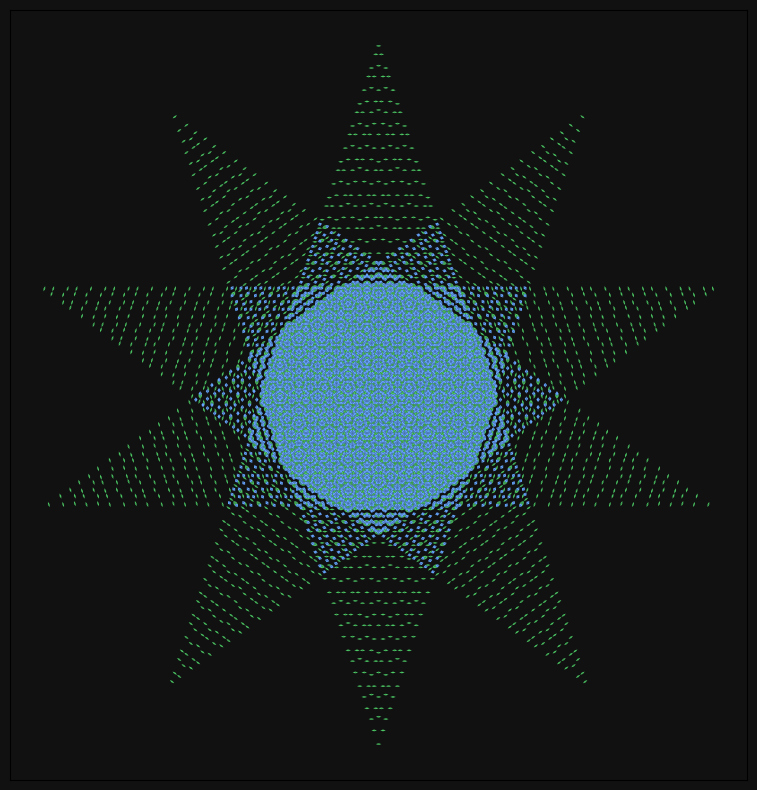

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

tau = np.pi * 2
D = 5          # number of directions
L = 31         # lines per direction
G = 0.25       # spacing

es = np.ones(D) / D   # same as JS default
off_x = 0.0
off_y = 0.0

def get_e_ang(e_i):
    return tau/4 + e_i * tau / D  # π/2 + 2πk/D

def line_intersection(p1, d1, p2, d2):
    """Intersection of two lines p1 + t d1 and p2 + s d2."""
    A = np.array([d1, -d2]).T
    b = p2 - p1
    try:
        t, s = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None
    return p1 + t * d1

def compute_goal(pos, d1, d2, c):
    """CPU version of the shader’s 'goal' computation."""
    e_scale = 2.0 / D
    goal = np.zeros(2)
    for i in range(D):
        ang = get_e_ang(i)
        unit = np.array([np.cos(ang), np.sin(ang)])
        units = np.dot(unit, pos) / G - es[i]

        if i == d1:
            units = np.round(units)
            if c in (0, 1):
                units -= 1.0
        elif i == d2:
            units = np.round(units)
            if c in (1, 2):
                units -= 1.0
        else:
            units = np.floor(units)

        goal += unit * (units * G * e_scale)

    # offset (kept zero here, but you can add scroll logic)
    goal[0] += off_x
    goal[1] += off_y
    return goal

polys = []
colors = []

for d1 in range(D):
    for d2 in range(d1 + 1, D):
        ang1 = get_e_ang(d1)
        ang2 = get_e_ang(d2)
        unit1 = np.array([np.cos(ang1), np.sin(ang1)])
        unit2 = np.array([np.cos(ang2), np.sin(ang2)])
        side1 = np.array([np.cos(ang1 + tau/4), np.sin(ang1 + tau/4)])
        side2 = np.array([np.cos(ang2 + tau/4), np.sin(ang2 + tau/4)])

        for i in range(L):
            for j in range(L):
                len1 = (es[d1] + (i - L//2)) * G
                len2 = (es[d2] + (j - L//2)) * G
                p1 = unit1 * len1
                p2 = unit2 * len2
                pos = line_intersection(p1, side1, p2, side2)
                if pos is None:
                    continue

                # four vertices (c = 0,1,2,3)
                verts = [compute_goal(pos, d1, d2, c) for c in (0, 1, 2, 3)]
                v0, v1, v2, v3 = verts

                # two triangles per rhombus
                polys.append([v0, v1, v3])
                polys.append([v1, v2, v3])

                # color by angle difference
                diff = (d1 - d2) % D
                diff = min(diff, D - diff) - 1   # 0 or 1 for D=5
                if diff == 0:
                    col = (0.40, 0.65, 1.00, 1.0)  # blue-ish
                else:
                    col = (0.30, 0.80, 0.40, 1.0)  # green-ish
                colors.append(col)
                colors.append(col)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
fig.patch.set_facecolor("#111111")
ax.set_facecolor("#111111")

pc = PolyCollection(polys, facecolors=colors, edgecolors='none')
ax.add_collection(pc)

all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
xmin, ymin = all_pts.min(axis=0)
xmax, ymax = all_pts.max(axis=0)
mx, my = 0.05 * (xmax - xmin), 0.05 * (ymax - ymin)
ax.set_xlim(xmin - mx, xmax + mx)
ax.set_ylim(ymin - my, ymax + my)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

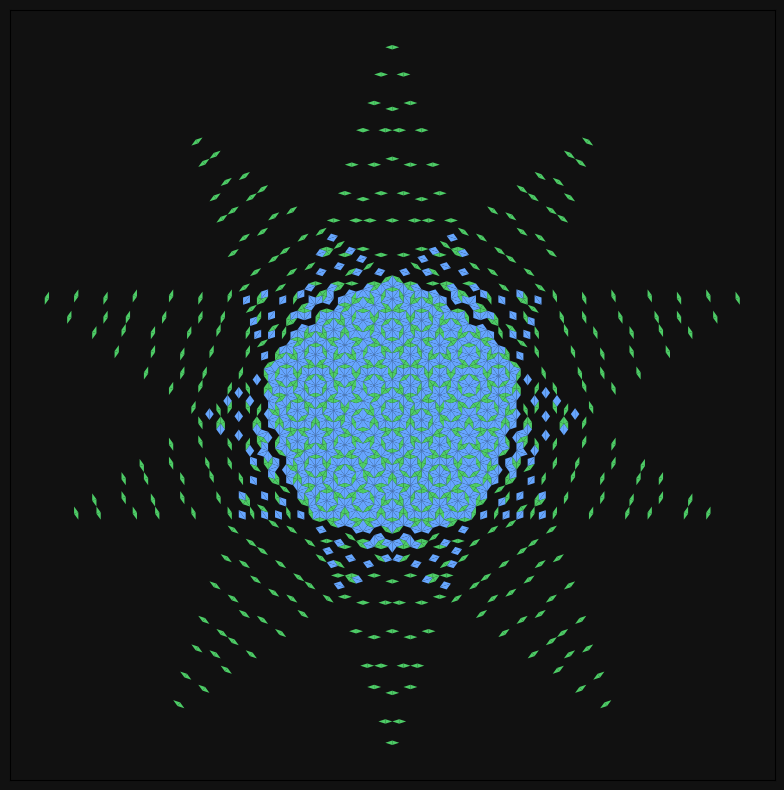

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

tau = np.pi * 2
D = 5          # number of directions
L = 31         # lines per direction (total index span)
G = 0.25       # spacing

es = np.ones(D) / D   # same as JS default
off_x = 0.0
off_y = 0.0

# ==== 关键参数：只显示前 K 层 ====
K = 6   # 可以调整：1,2,...  越大显示范围越大

def get_e_ang(e_i):
    return tau/4 + e_i * tau / D  # π/2 + 2πk/D

def line_intersection(p1, d1, p2, d2):
    """Intersection of two lines p1 + t d1 and p2 + s d2."""
    A = np.array([d1, -d2]).T
    b = p2 - p1
    try:
        t, s = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None
    return p1 + t * d1

def compute_goal(pos, d1, d2, c):
    """CPU version of the shader’s 'goal' computation."""
    e_scale = 2.0 / D
    goal = np.zeros(2)
    for i in range(D):
        ang = get_e_ang(i)
        unit = np.array([np.cos(ang), np.sin(ang)])
        units = np.dot(unit, pos) / G - es[i]

        if i == d1:
            units = np.round(units)
            if c in (0, 1):
                units -= 1.0
        elif i == d2:
            units = np.round(units)
            if c in (1, 2):
                units -= 1.0
        else:
            units = np.floor(units)

        goal += unit * (units * G * e_scale)

    goal[0] += off_x
    goal[1] += off_y
    return goal

polys = []
colors = []

# 中心索引（对应 i-L//2 那一步）
center = L // 2

for d1 in range(D):
    for d2 in range(d1 + 1, D):
        ang1 = get_e_ang(d1)
        ang2 = get_e_ang(d2)
        unit1 = np.array([np.cos(ang1), np.sin(ang1)])
        unit2 = np.array([np.cos(ang2), np.sin(ang2)])
        side1 = np.array([np.cos(ang1 + tau/4), np.sin(ang1 + tau/4)])
        side2 = np.array([np.cos(ang2 + tau/4), np.sin(ang2 + tau/4)])

        for i in range(L):
            # 只保留 |i - center| <= K 的“前 K 层”
            if abs(i - center) > K:
                continue
            for j in range(L):
                if abs(j - center) > K:
                    continue

                len1 = (es[d1] + (i - center)) * G
                len2 = (es[d2] + (j - center)) * G
                p1 = unit1 * len1
                p2 = unit2 * len2
                pos = line_intersection(p1, side1, p2, side2)
                if pos is None:
                    continue

                # four vertices (c = 0,1,2,3)
                verts = [compute_goal(pos, d1, d2, c) for c in (0, 1, 2, 3)]
                v0, v1, v2, v3 = verts

                # two triangles per rhombus
                polys.append([v0, v1, v3])
                polys.append([v1, v2, v3])

                # color by angle difference
                diff = (d1 - d2) % D
                diff = min(diff, D - diff) - 1   # 0 or 1 for D=5
                if diff == 0:
                    col = (0.40, 0.65, 1.00, 1.0)  # blue-ish
                else:
                    col = (0.30, 0.80, 0.40, 1.0)  # green-ish
                colors.append(col)
                colors.append(col)

# ---- Plot ----
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
fig.patch.set_facecolor("#111111")
ax.set_facecolor("#111111")

pc = PolyCollection(polys, facecolors=colors, edgecolors='none')
ax.add_collection(pc)

all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
xmin, ymin = all_pts.min(axis=0)
xmax, ymax = all_pts.max(axis=0)
mx, my = 0.05 * (xmax - xmin), 0.05 * (ymax - ymin)
ax.set_xlim(xmin - mx, xmax + mx)
ax.set_ylim(ymin - my, ymax + my)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

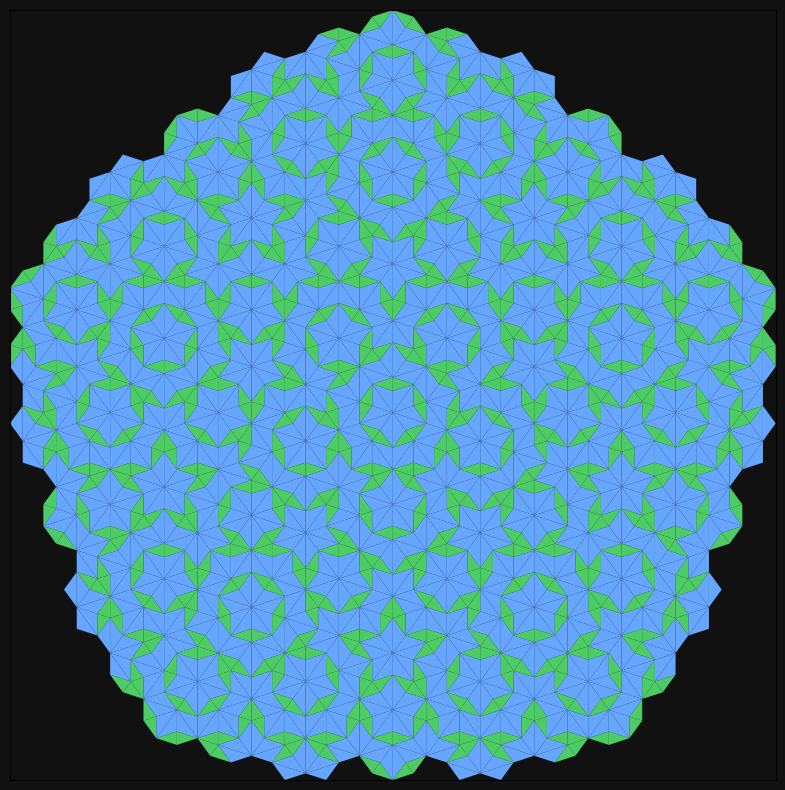

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

tau = np.pi * 2
D = 5
L = 31
G = 0.25
es = np.ones(D) / D
off_x = 0.0
off_y = 0.0
K = 6   # 控制整体“层数”大小

def get_e_ang(e_i):
    return tau/4 + e_i * tau / D

def line_intersection(p1, d1, p2, d2):
    A = np.array([d1, -d2]).T
    b = p2 - p1
    try:
        t, s = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None
    return p1 + t * d1

def compute_goal(pos, d1, d2, c):
    e_scale = 2.0 / D
    goal = np.zeros(2)
    for i in range(D):
        ang = get_e_ang(i)
        unit = np.array([np.cos(ang), np.sin(ang)])
        units = np.dot(unit, pos) / G - es[i]
        if i == d1:
            units = np.round(units)
            if c in (0, 1):
                units -= 1.0
        elif i == d2:
            units = np.round(units)
            if c in (1, 2):
                units -= 1.0
        else:
            units = np.floor(units)
        goal += unit * (units * G * e_scale)
    goal[0] += off_x
    goal[1] += off_y
    return goal

# ---------- 生成所有菱形 ----------
rhombi_vertices = []   # 每个元素是 (v0, v1, v2, v3)
rhombi_centers = []
rhombi_colors = []

center_idx = L // 2

for d1 in range(D):
    for d2 in range(d1 + 1, D):
        ang1 = get_e_ang(d1)
        ang2 = get_e_ang(d2)
        unit1 = np.array([np.cos(ang1), np.sin(ang1)])
        unit2 = np.array([np.cos(ang2), np.sin(ang2)])
        side1 = np.array([np.cos(ang1 + tau/4), np.sin(ang1 + tau/4)])
        side2 = np.array([np.cos(ang2 + tau/4), np.sin(ang2 + tau/4)])

        for i in range(L):
            if abs(i - center_idx) > K:
                continue
            for j in range(L):
                if abs(j - center_idx) > K:
                    continue

                len1 = (es[d1] + (i - center_idx)) * G
                len2 = (es[d2] + (j - center_idx)) * G
                p1 = unit1 * len1
                p2 = unit2 * len2
                pos = line_intersection(p1, side1, p2, side2)
                if pos is None:
                    continue

                v0, v1, v2, v3 = [compute_goal(pos, d1, d2, c) for c in (0, 1, 2, 3)]
                rhombi_vertices.append((v0, v1, v2, v3))
                center = (v0 + v1 + v2 + v3) / 4.0
                rhombi_centers.append(center)

                diff = (d1 - d2) % D
                diff = min(diff, D - diff) - 1
                if diff == 0:
                    col = (0.40, 0.65, 1.00, 1.0)  # 蓝
                else:
                    col = (0.30, 0.80, 0.40, 1.0)  # 绿
                rhombi_colors.append(col)

rhombi_centers = np.vstack(rhombi_centers)
N = len(rhombi_centers)

# ---------- 基于“块之间是否紧密相连”的连通检测 ----------
# 1. 估计相邻块之间的典型距离
dist_matrix = np.linalg.norm(
    rhombi_centers[:, None, :] - rhombi_centers[None, :, :],
    axis=2
)
np.fill_diagonal(dist_matrix, np.inf)
nearest = dist_matrix.min(axis=1)
base = np.median(nearest)
thresh = base * 1.3  # 距离小于 thresh 的视为相邻块

# 2. 建图
adj = [[] for _ in range(N)]
for i in range(N):
    nbrs = np.where(dist_matrix[i] < thresh)[0]
    for j in nbrs:
        adj[i].append(j)

# 3. 从“离原点最近的块”开始 BFS，只保留同一连通分量
radii = np.linalg.norm(rhombi_centers, axis=1)
start = np.argmin(radii)

visited = np.zeros(N, dtype=bool)
stack = [start]
visited[start] = True
while stack:
    i = stack.pop()
    for j in adj[i]:
        if not visited[j]:
            visited[j] = True
            stack.append(j)

keep_indices = np.where(visited)[0]

# ---------- 只把连通分量里的块三角化并绘制 ----------
polys = []
colors = []
for idx in keep_indices:
    v0, v1, v2, v3 = rhombi_vertices[idx]
    col = rhombi_colors[idx]
    polys.append([v0, v1, v3])
    polys.append([v1, v2, v3])
    colors.append(col)
    colors.append(col)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
fig.patch.set_facecolor("#111111")
ax.set_facecolor("#111111")

pc = PolyCollection(polys, facecolors=colors, edgecolors='none')
ax.add_collection(pc)

all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
xmin, ymin = all_pts.min(axis=0)
xmax, ymax = all_pts.max(axis=0)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

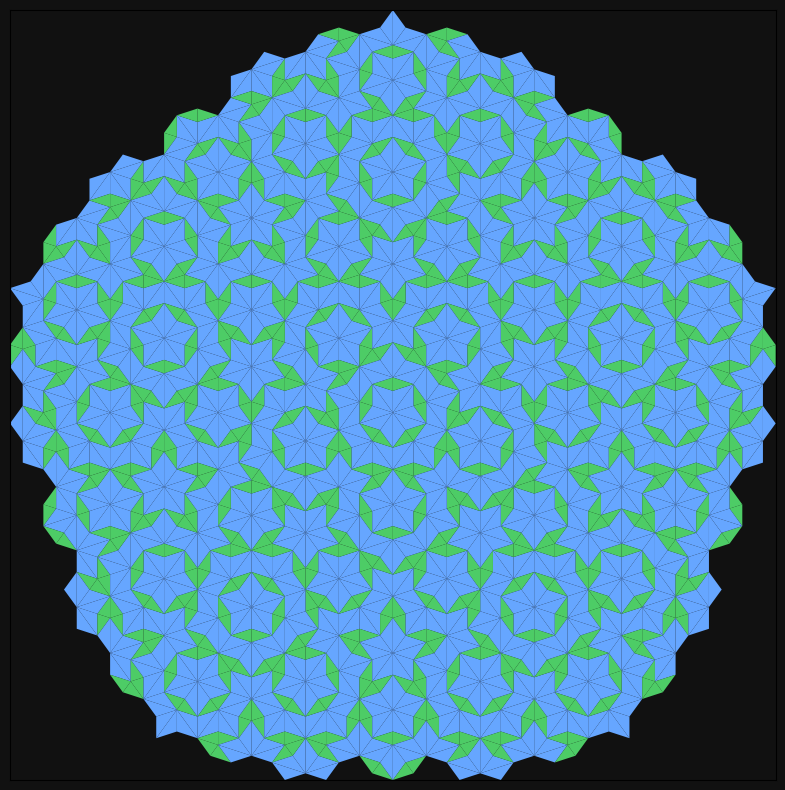

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

tau = np.pi * 2
D = 5
L = 31
G = 0.25
es = np.ones(D) / D
off_x = 0.0
off_y = 0.0
K = 6   # 控制“层数”

def get_e_ang(e_i):
    return tau/4 + e_i * tau / D

def line_intersection(p1, d1, p2, d2):
    A = np.array([d1, -d2]).T
    b = p2 - p1
    try:
        t, s = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None
    return p1 + t * d1

def compute_goal(pos, d1, d2, c):
    e_scale = 2.0 / D
    goal = np.zeros(2)
    for i in range(D):
        ang = get_e_ang(i)
        unit = np.array([np.cos(ang), np.sin(ang)])
        units = np.dot(unit, pos) / G - es[i]
        if i == d1:
            units = np.round(units)
            if c in (0, 1):
                units -= 1.0
        elif i == d2:
            units = np.round(units)
            if c in (1, 2):
                units -= 1.0
        else:
            units = np.floor(units)
        goal += unit * (units * G * e_scale)
    goal[0] += off_x
    goal[1] += off_y
    return goal

# ----- 生成所有菱形 -----
rhombi_vertices = []
rhombi_centers = []
rhombi_colors = []

center_idx = L // 2

for d1 in range(D):
    for d2 in range(d1 + 1, D):
        ang1 = get_e_ang(d1)
        ang2 = get_e_ang(d2)
        unit1 = np.array([np.cos(ang1), np.sin(ang1)])
        unit2 = np.array([np.cos(ang2), np.sin(ang2)])
        side1 = np.array([np.cos(ang1 + tau/4), np.sin(ang1 + tau/4)])
        side2 = np.array([np.cos(ang2 + tau/4), np.sin(ang2 + tau/4)])

        for i in range(L):
            if abs(i - center_idx) > K:
                continue
            for j in range(L):
                if abs(j - center_idx) > K:
                    continue

                len1 = (es[d1] + (i - center_idx)) * G
                len2 = (es[d2] + (j - center_idx)) * G
                p1 = unit1 * len1
                p2 = unit2 * len2
                pos = line_intersection(p1, side1, p2, side2)
                if pos is None:
                    continue

                v0, v1, v2, v3 = [compute_goal(pos, d1, d2, c) for c in (0,1,2,3)]
                rhombi_vertices.append((v0, v1, v2, v3))
                center = (v0 + v1 + v2 + v3) / 4.0
                rhombi_centers.append(center)

                diff = (d1 - d2) % D
                diff = min(diff, D - diff) - 1
                if diff == 0:
                    col = (0.40, 0.65, 1.00, 1.0)
                else:
                    col = (0.30, 0.80, 0.40, 1.0)
                rhombi_colors.append(col)

rhombi_centers = np.vstack(rhombi_centers)
N = len(rhombi_centers)

# ----- 邻接图（块之间是否紧密相连） -----
dist_matrix = np.linalg.norm(
    rhombi_centers[:, None, :] - rhombi_centers[None, :, :],
    axis=2
)
np.fill_diagonal(dist_matrix, np.inf)
nearest = dist_matrix.min(axis=1)
base = np.median(nearest)
thresh = base * 1.3

adj = [[] for _ in range(N)]
for i in range(N):
    nbrs = np.where(dist_matrix[i] < thresh)[0]
    for j in nbrs:
        adj[i].append(j)

# ----- 主连通分量 -----
radii = np.linalg.norm(rhombi_centers, axis=1)
start = np.argmin(radii)

visited = np.zeros(N, dtype=bool)
stack = [start]
visited[start] = True
while stack:
    i = stack.pop()
    for j in adj[i]:
        if not visited[j]:
            visited[j] = True
            stack.append(j)

comp = np.where(visited)[0]

# ----- 半径保留机制：自动选 r_cut -----
deg = np.array([len(adj[i]) for i in range(N)])
deg_comp = deg[comp]
r_comp = radii[comp]

# 内核层（例如前 20% 半径）作为结构基准
inner_mask = r_comp < np.quantile(r_comp, 0.2)
inner_deg_median = np.median(deg_comp[inner_mask])

# 要求最小度数为内核度数的 80%
deg_min = int(np.floor(inner_deg_median * 0.8))

# 所有度数 >= deg_min 的块视为“结构完整层”
good_mask = deg_comp >= deg_min
good_radii = r_comp[good_mask]
r_cut = good_radii.max()   # 自动得到最大稳定半径

# 最终保留：在主连通分量内，且半径 <= r_cut
final_indices = comp[r_comp <= r_cut]

# ----- 三角化 + 绘制 -----
polys = []
colors = []
for idx in final_indices:
    v0, v1, v2, v3 = rhombi_vertices[idx]
    col = rhombi_colors[idx]
    polys.append([v0, v1, v3])
    polys.append([v1, v2, v3])
    colors.append(col)
    colors.append(col)

fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
fig.patch.set_facecolor("#111111")
ax.set_facecolor("#111111")

pc = PolyCollection(polys, facecolors=colors, edgecolors='none')
ax.add_collection(pc)

all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
xmin, ymin = all_pts.min(axis=0)
xmax, ymax = all_pts.max(axis=0)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks([])
ax.set_yticks([])

plt.tight_layout()
plt.show()

In [10]:
# ----- 主连通分量 + BFS 层数 -----
radii = np.linalg.norm(rhombi_centers, axis=1)
start = np.argmin(radii)

visited = np.zeros(N, dtype=bool)
dist_layer = np.full(N, -1, dtype=int)  # BFS 层编号
queue = [start]
visited[start] = True
dist_layer[start] = 0
head = 0
while head < len(queue):
    i = queue[head]
    head += 1
    for j in adj[i]:
        if not visited[j]:
            visited[j] = True
            dist_layer[j] = dist_layer[i] + 1
            queue.append(j)

comp = np.where(visited)[0]

# ……（中间是和之前一样的半径/度数筛选，得到 r_cut）……

# ----- 用 BFS 层数近似“第几圈” -----
max_r_by_layer = {}
for idx in comp:
    layer = dist_layer[idx]
    rr = radii[idx]
    if layer not in max_r_by_layer or rr > max_r_by_layer[layer]:
        max_r_by_layer[layer] = rr

layer_for_rcut = None
for layer in sorted(max_r_by_layer.keys()):
    if r_cut <= max_r_by_layer[layer] + 1e-9:
        layer_for_rcut = layer
        break

print("r_cut =", r_cut)
print("approx ring index (BFS layer) =", layer_for_rcut)

r_cut = 1.7753288904374112
approx ring index (BFS layer) = 23


max graph distance from central five = 23
ring count = 22


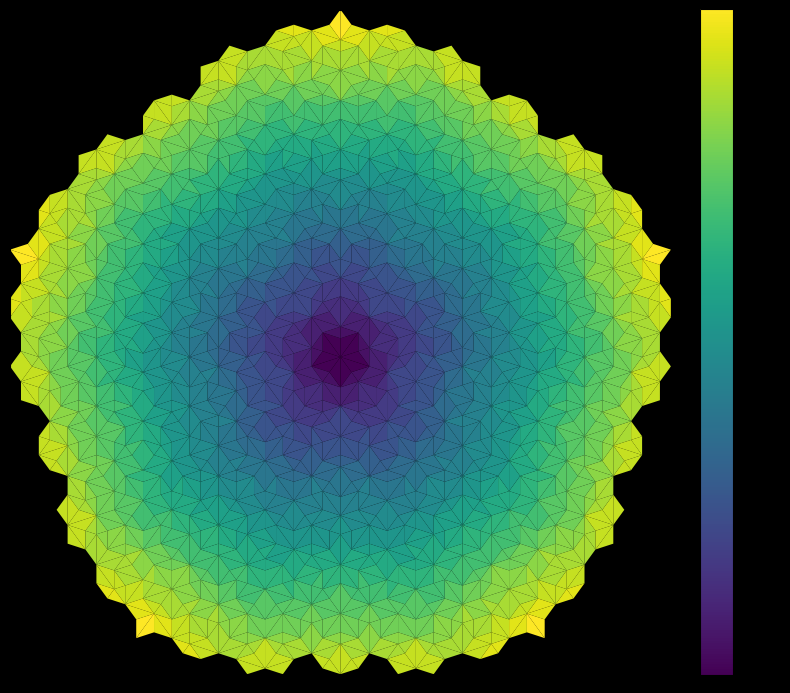

In [11]:
import numpy as np

# 半径（到原点）用于找最中心的五个块
radii = np.linalg.norm(rhombi_centers, axis=1)
central_five = np.argsort(radii)[:5]   # 最中心的 5 个块索引

N = len(rhombi_centers)

# 以“中心五块”为源做 BFS，求每个块到中心的最短图距离
dist_from_center5 = np.full(N, -1, dtype=int)
q = []

for idx in central_five:
    dist_from_center5[idx] = 0
    q.append(idx)

head = 0
while head < len(q):
    i = q[head]
    head += 1
    for j in adj[i]:
        if dist_from_center5[j] == -1:
            dist_from_center5[j] = dist_from_center5[i] + 1
            q.append(j)

# 只看最终保留下来的块，取最大图距离
dists_final = dist_from_center5[final_indices]
max_graph_dist = int(dists_final.max())

# 你的“环数”定义：中间隔了多少个完整块 = 图距离 - 1
ring_count = max(0, max_graph_dist - 1)

print("max graph distance from central five =", max_graph_dist)
print("ring count =", ring_count)

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

# 把距离归一化到 [0, 1]，用 colormap 映射颜色
norm_dists = dists_final.astype(float) / max_graph_dist
cmap = plt.get_cmap("viridis")  # 也可以换成 'plasma', 'magma' 等

# 为每个块建立索引→颜色的查找表
color_lookup = {idx: cmap(norm_dists[k]) for k, idx in enumerate(final_indices)}

# 组装三角形面片（每个菱形拆成 2 个三角形）
polys = []
colors = []
for idx in final_indices:
    v0, v1, v2, v3 = rhombi_vertices[idx]
    col = color_lookup[idx]
    polys.append([v0, v1, v3])
    polys.append([v1, v2, v3])
    colors.append(col)
    colors.append(col)

# 绘图
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect('equal')
fig.patch.set_facecolor("black")
ax.set_facecolor("black")

pc = PolyCollection(polys, facecolors=colors, edgecolors='none')
ax.add_collection(pc)

all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
xmin, ymin = all_pts.min(axis=0)
xmax, ymax = all_pts.max(axis=0)
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
ax.set_xticks([])
ax.set_yticks([])

# colorbar 显示“距中心五块的图距离（环 index）”
sm = plt.cm.ScalarMappable(cmap=cmap,
                           norm=plt.Normalize(vmin=0, vmax=max_graph_dist))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
cbar.set_label("Graph distance from central five (ring index)")

plt.tight_layout()
plt.show()

最大可用环数 max_ring = 22


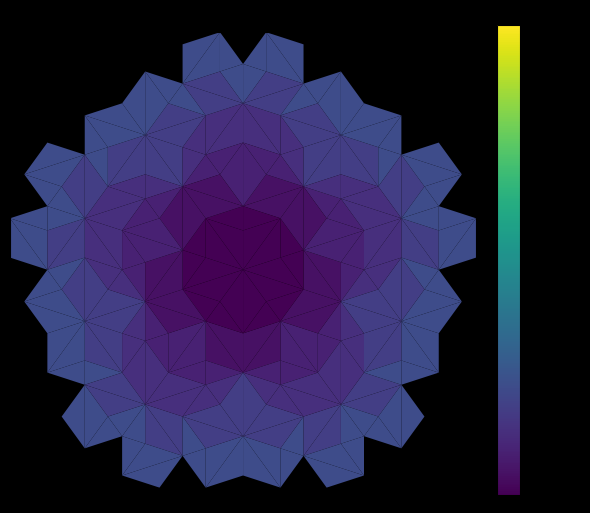

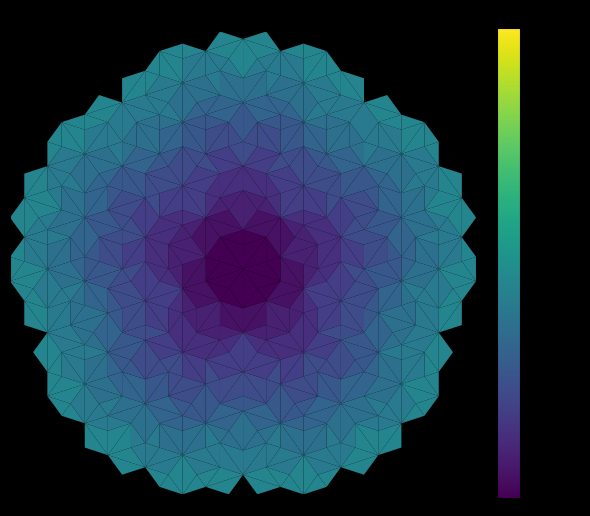

In [13]:
import numpy as np

N = len(rhombi_centers)

# 先找“最中心的五个块”
radii = np.linalg.norm(rhombi_centers, axis=1)
central_five = np.argsort(radii)[:5]

# BFS：从中心五块出发，只要能到达的都视为“同一连通分量”
dist_from_center5 = np.full(N, -1, dtype=int)
q = []

for idx in central_five:
    dist_from_center5[idx] = 0
    q.append(idx)

head = 0
while head < len(q):
    i = q[head]
    head += 1
    for j in adj[i]:
        if dist_from_center5[j] == -1:    # 还没访问过
            dist_from_center5[j] = dist_from_center5[i] + 1
            q.append(j)

# 只把 dist >= 0 的视为“和中心连通”，其余是不连通的垃圾
connected_mask = dist_from_center5 >= 0
valid_dists = dist_from_center5[connected_mask]

max_graph_dist = int(valid_dists.max())

# 环号：对连通部分是 graph_dist - 1；其余保持 -1
ring_index = np.full(N, -1, dtype=int)
ring_index[connected_mask] = np.maximum(valid_dists - 1, 0)

max_ring = ring_index.max()
print("最大可用环数 max_ring =", max_ring)

def tiles_for_rings(rings: int):
    """
    返回在给定圈数以内、且与中心连通的块索引列表。
    只包含 ring_index >= 0 的块（排除所有不连通部分）。
    """
    rings = int(rings)
    mask = (ring_index >= 0) & (ring_index <= rings)
    return np.where(mask)[0]

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

def plot_for_rings(rings: int):
    idxs = tiles_for_rings(rings)
    if len(idxs) == 0:
        print("rings 太小，没有块可画")
        return

    cmap = plt.get_cmap("viridis")
    norm_vals = ring_index[idxs].astype(float) / max_ring
    colors = [cmap(v) for v in norm_vals]

    polys = []
    facecolors = []
    for idx, col in zip(idxs, colors):
        v0, v1, v2, v3 = rhombi_vertices[idx]
        polys.append([v0, v1, v3])
        polys.append([v1, v2, v3])
        facecolors.append(col)
        facecolors.append(col)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    fig.patch.set_facecolor("black")
    ax.set_facecolor("black")

    pc = PolyCollection(polys, facecolors=facecolors, edgecolors='none')
    ax.add_collection(pc)

    all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
    xmin, ymin = all_pts.min(axis=0)
    xmax, ymax = all_pts.max(axis=0)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"{rings} rings (0 = center, only connected part)")

    sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin=0, vmax=max_ring))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Ring index")

    plt.tight_layout()
    plt.show()
    
plot_for_rings(5)   # 画 0~5 圈、且与中心连通的所有块
plot_for_rings(10)  # 画到第 10 圈

max_ring = 22


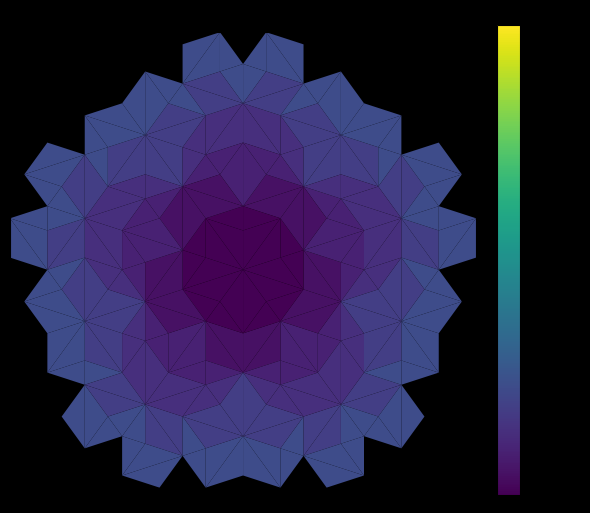

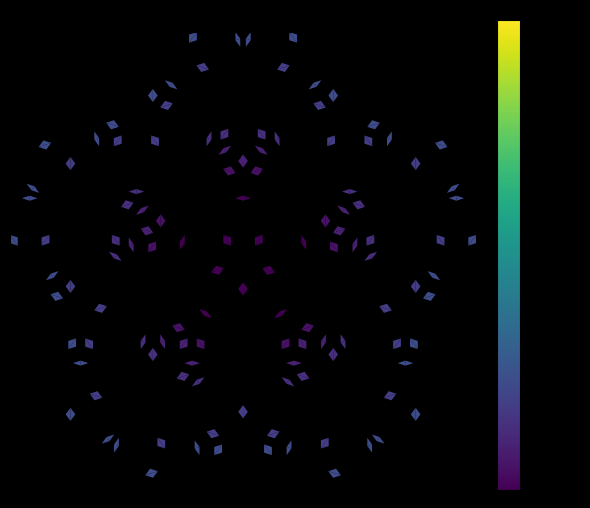

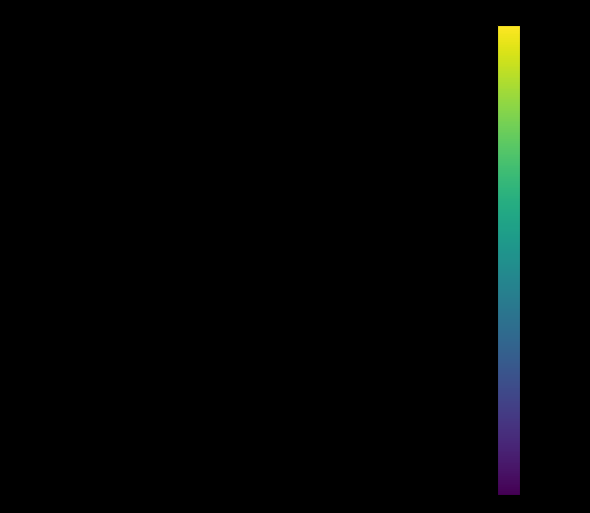

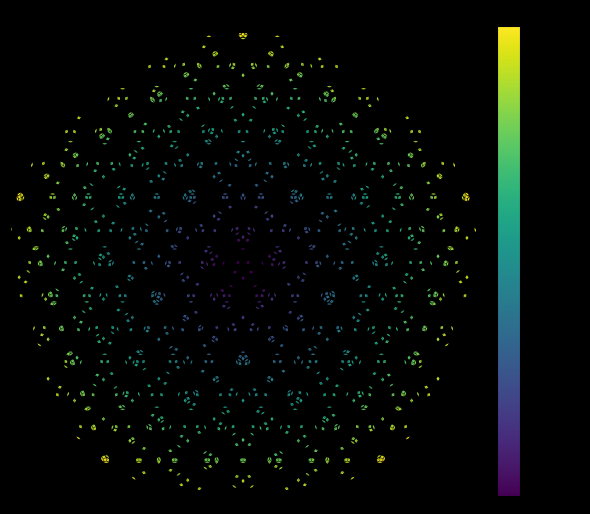

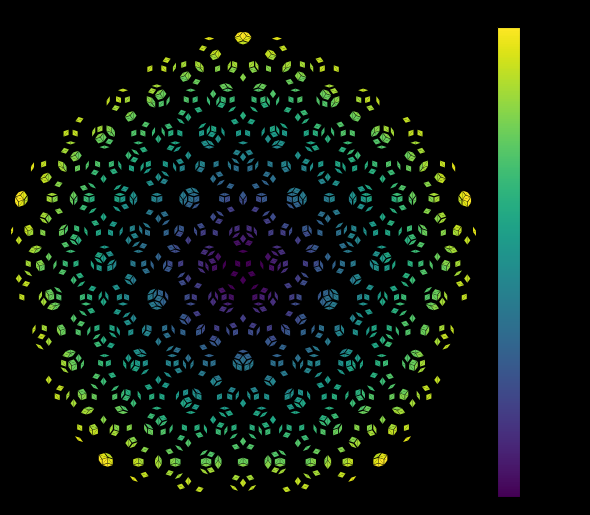

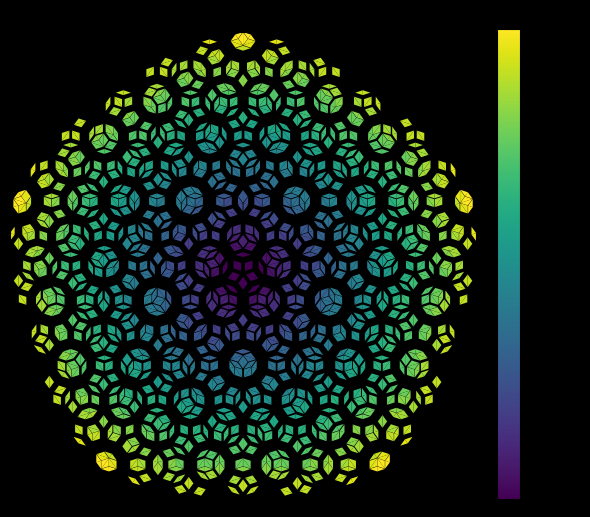

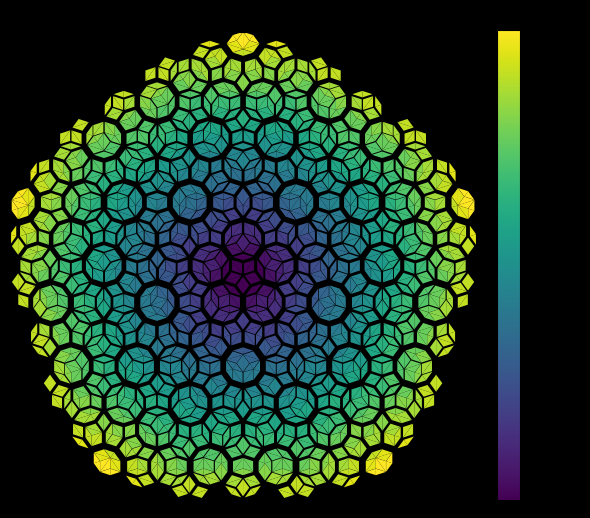

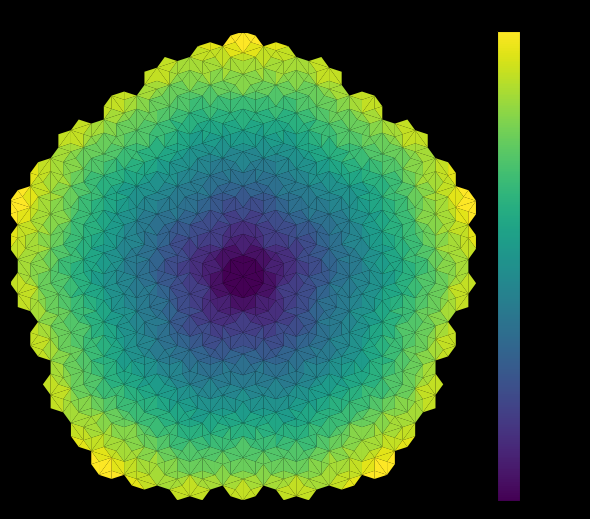

In [17]:
tau = np.pi * 2
D = 5
L = 31
G = 0.25
es = np.ones(D) / D
off_x = 0.0
off_y = 0.0
K = 6   # 窗口大小（i,j 距中心最多 K）

def get_e_ang(e_i):
    return tau/4 + e_i * tau / D

def line_intersection(p1, d1, p2, d2):
    A = np.array([d1, -d2]).T
    b = p2 - p1
    try:
        t, s = np.linalg.solve(A, b)
    except np.linalg.LinAlgError:
        return None
    return p1 + t * d1

def compute_goal(pos, d1, d2, c):
    e_scale = 2.0 / D
    goal = np.zeros(2)
    for i in range(D):
        ang = get_e_ang(i)
        unit = np.array([np.cos(ang), np.sin(ang)])
        units = np.dot(unit, pos) / G - es[i]
        if i == d1:
            units = np.round(units)
            if c in (0, 1):
                units -= 1.0
        elif i == d2:
            units = np.round(units)
            if c in (1, 2):
                units -= 1.0
        else:
            units = np.floor(units)
        goal += unit * (units * G * e_scale)
    goal[0] += off_x
    goal[1] += off_y
    return goal

# -------- 生成所有菱形：同时记录 pos & goal --------
rhombi_vertices_goal = []   # (N, 4, 2)
rhombi_pos = []             # (N, 2)
rhombi_centers = []

center_idx = L // 2

for d1 in range(D):
    for d2 in range(d1 + 1, D):
        ang1 = get_e_ang(d1)
        ang2 = get_e_ang(d2)
        unit1 = np.array([np.cos(ang1), np.sin(ang1)])
        unit2 = np.array([np.cos(ang2), np.sin(ang2)])
        side1 = np.array([np.cos(ang1 + tau/4), np.sin(ang1 + tau/4)])
        side2 = np.array([np.cos(ang2 + tau/4), np.sin(ang2 + tau/4)])

        for i in range(L):
            if abs(i - center_idx) > K:
                continue
            for j in range(L):
                if abs(j - center_idx) > K:
                    continue

                len1 = (es[d1] + (i - center_idx)) * G
                len2 = (es[d2] + (j - center_idx)) * G
                p1 = unit1 * len1
                p2 = unit2 * len2
                pos = line_intersection(p1, side1, p2, side2)
                if pos is None:
                    continue

                # 四个 goal 顶点
                goals = np.array([compute_goal(pos, d1, d2, c) for c in (0, 1, 2, 3)])
                rhombi_vertices_goal.append(goals)
                rhombi_pos.append(pos)
                rhombi_centers.append(goals.mean(axis=0))  # 用 goal 中心做邻接/半径

rhombi_vertices_goal = np.stack(rhombi_vertices_goal, axis=0)  # (N,4,2)
rhombi_pos = np.vstack(rhombi_pos)                             # (N,2)
rhombi_centers = np.vstack(rhombi_centers)                     # (N,2)
N = len(rhombi_centers)

# --- 邻接表 ---
dist_matrix = np.linalg.norm(
    rhombi_centers[:, None, :] - rhombi_centers[None, :, :],
    axis=2
)
np.fill_diagonal(dist_matrix, np.inf)
nearest = dist_matrix.min(axis=1)
base = np.median(nearest)
thresh = base * 1.3

adj = [[] for _ in range(N)]
for i in range(N):
    nbrs = np.where(dist_matrix[i] < thresh)[0]
    for j in nbrs:
        adj[i].append(j)

# --- BFS：从“最中心五块”出发，算图距离 + 连通分量 ---
radii = np.linalg.norm(rhombi_centers, axis=1)
central_five = np.argsort(radii)[:5]

dist_from_center5 = np.full(N, -1, dtype=int)
q = []
for idx in central_five:
    dist_from_center5[idx] = 0
    q.append(idx)

head = 0
while head < len(q):
    i = q[head]
    head += 1
    for j in adj[i]:
        if dist_from_center5[j] == -1:
            dist_from_center5[j] = dist_from_center5[i] + 1
            q.append(j)

# 连通部分 = 能被 BFS 访问到的块
connected_mask = dist_from_center5 >= 0
valid_dists = dist_from_center5[connected_mask]
max_graph_dist = int(valid_dists.max())

# 环号：graph_dist - 1；不连通的记为 -1
ring_index = np.full(N, -1, dtype=int)
ring_index[connected_mask] = np.maximum(valid_dists - 1, 0)
max_ring = ring_index.max()

print("max_ring =", max_ring)

def tiles_for_rings(rings: int):
    """返回在给定圈数以内，且与中心连通的块索引"""
    rings = int(rings)
    mask = (ring_index >= 0) & (ring_index <= rings)
    return np.where(mask)[0]# --- 邻接表 ---
dist_matrix = np.linalg.norm(
    rhombi_centers[:, None, :] - rhombi_centers[None, :, :],
    axis=2
)
np.fill_diagonal(dist_matrix, np.inf)
nearest = dist_matrix.min(axis=1)
base = np.median(nearest)
thresh = base * 1.3

adj = [[] for _ in range(N)]
for i in range(N):
    nbrs = np.where(dist_matrix[i] < thresh)[0]
    for j in nbrs:
        adj[i].append(j)

# --- BFS：从“最中心五块”出发，算图距离 + 连通分量 ---
radii = np.linalg.norm(rhombi_centers, axis=1)
central_five = np.argsort(radii)[:5]

dist_from_center5 = np.full(N, -1, dtype=int)
q = []
for idx in central_five:
    dist_from_center5[idx] = 0
    q.append(idx)

head = 0
while head < len(q):
    i = q[head]
    head += 1
    for j in adj[i]:
        if dist_from_center5[j] == -1:
            dist_from_center5[j] = dist_from_center5[i] + 1
            q.append(j)

# 连通部分 = 能被 BFS 访问到的块
connected_mask = dist_from_center5 >= 0
valid_dists = dist_from_center5[connected_mask]
max_graph_dist = int(valid_dists.max())

# 环号：graph_dist - 1；不连通的记为 -1
ring_index = np.full(N, -1, dtype=int)
ring_index[connected_mask] = np.maximum(valid_dists - 1, 0)
max_ring = ring_index.max()


def tiles_for_rings(rings: int):
    """返回在给定圈数以内，且与中心连通的块索引"""
    rings = int(rings)
    mask = (ring_index >= 0) & (ring_index <= rings)
    return np.where(mask)[0]

import matplotlib.pyplot as plt
from matplotlib.collections import PolyCollection

def plot_for_rings(rings: int, slider: float = 1.0):
    """
    rings  : 要保留的最大圈数（0 = 只中心, 1 = 中心+第一圈, ...）
    slider : 0.0 时所有顶点收缩为交点 pos
             1.0 时为完整菱形 goal
             中间值为线性插值
    """
    rings = int(rings)
    slider = float(np.clip(slider, 0.0, 1.0))

    idxs = tiles_for_rings(rings)
    if len(idxs) == 0:
        print("rings 太小，没有块可画")
        return

    cmap = plt.get_cmap("viridis")
    norm_vals = ring_index[idxs].astype(float) / max_ring
    tile_colors = [cmap(v) for v in norm_vals]

    polys = []
    facecolors = []

    for idx, col in zip(idxs, tile_colors):
        pos = rhombi_pos[idx]               # (2,)
        goals = rhombi_vertices_goal[idx]   # (4,2)

        # 在 pos 和 goal 之间插值
        interp = (1.0 - slider) * pos + slider * goals  # (4,2)
        v0, v1, v2, v3 = interp

        polys.append([v0, v1, v3])
        polys.append([v1, v2, v3])
        facecolors.append(col)
        facecolors.append(col)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set_aspect('equal')
    fig.patch.set_facecolor("black")
    ax.set_facecolor("black")

    pc = PolyCollection(polys, facecolors=facecolors, edgecolors='none')
    ax.add_collection(pc)

    all_pts = np.vstack([np.array(p) for poly in polys for p in poly])
    xmin, ymin = all_pts.min(axis=0)
    xmax, ymax = all_pts.max(axis=0)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"rings = {rings}, slider = {slider:.2f}")

    sm = plt.cm.ScalarMappable(cmap=cmap,
                               norm=plt.Normalize(vmin=0, vmax=max_ring))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Ring index")

    plt.tight_layout()
    plt.show()

# 只看 5 圈，完全展开（goal）
plot_for_rings(5, slider=1.0)

# 只看 5 圈，刚从交点开始长出来一点点
plot_for_rings(5, slider=0.2)

# 所有圈，做一个“从点云到完整铺砌”的演化
for s in np.linspace(0, 1, 6):
    plot_for_rings(max_ring, slider=s)

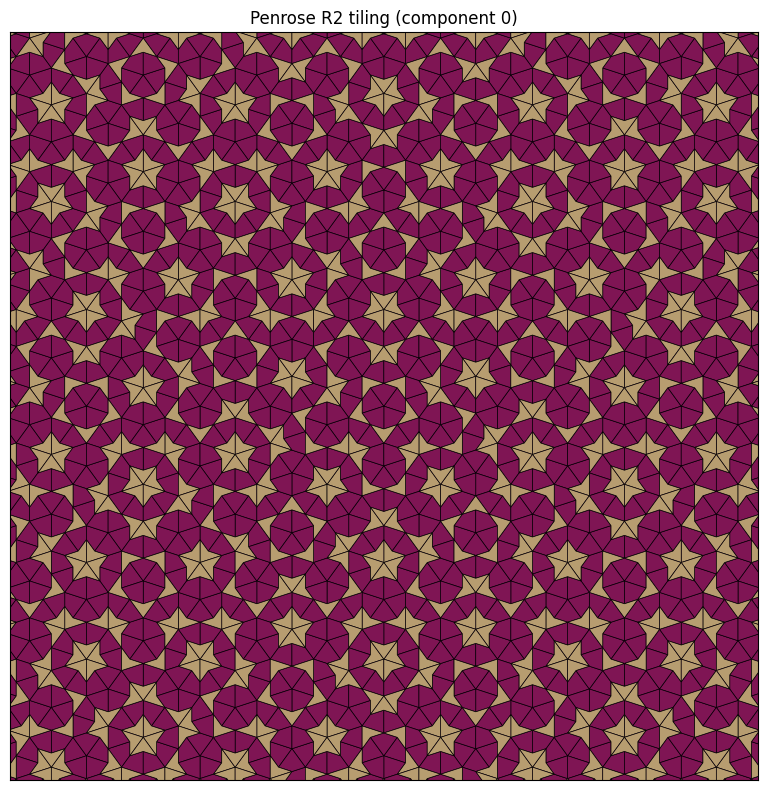

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Basic vector helpers (translation of JS functions)
# ------------------------------------------------------------

def dist_sq(a, b):
    x0, y0 = a
    x1, y1 = b
    dx = x0 - x1
    dy = y0 - y1
    return dx*dx + dy*dy

def mul(a, b):
    return [a[0] * b, a[1] * b]

def dot(a, b):
    # Only use first two components, as in JS
    return a[0] * b[0] + a[1] * b[1]

def sub(a, b):
    return [a[0] - b[0], a[1] - b[1]]

def add(a, b):
    return [a[0] + b[0], a[1] + b[1]]

def trans(a, B):
    # B = [b00, b01, b10, b11]
    return [a[0] * B[0] + a[1] * B[2],
            a[0] * B[1] + a[1] * B[3]]

def line_intersect(x1, y1, x2, y2, x3, y3, x4, y4):
    """
    Port of JS line_intersect:
    returns dict {x, y, seg1, seg2} or None
    """
    denom = (y4 - y3)*(x2 - x1) - (x4 - x3)*(y2 - y1)
    if denom == 0:
        return None
    ua = ((x4 - x3)*(y1 - y3) - (y4 - y3)*(x1 - x3)) / denom
    ub = ((x2 - x1)*(y1 - y3) - (y2 - y1)*(x1 - x3)) / denom
    x = x1 + ua * (x2 - x1)
    y = y1 + ua * (y2 - y1)
    return {
        "x": x,
        "y": y,
        "seg1": (0 <= ua <= 1),
        "seg2": (0 <= ub <= 1),
    }


# ------------------------------------------------------------
# PointSet for approximate membership (translation of create_point_set)
# ------------------------------------------------------------

class PointSet:
    def __init__(self):
        self.point_set = set()

    def _key(self, a):
        return (round(a[0] * 1_000_000), round(a[1] * 1_000_000))

    def add(self, a):
        self.point_set.add(self._key(a))

    def ask(self, a):
        ax, ay = self._key(a)
        for dy in (-1, 0, 1):
            for dx in (-1, 0, 1):
                if (ax + dx, ay + dy) in self.point_set:
                    return True
        return False


# ------------------------------------------------------------
# Core Penrose R2 generation (single pass of tile_floor)
# ------------------------------------------------------------

def generate_penrose_r2(width=800, height=800, offset=(0.0, 0.0),
                        rr=0.2, gap_div=30.0):
    """
    Translation of tile_floor(c, offset) from JS into Python.

    Returns:
        kites, darts
    where each is a list of polygons, and each polygon is a list of (x, y) tuples.
    """
    ox, oy = offset
    # Background radius and spacing
    r = math.sqrt((width/2)**2 + (height/2)**2)
    gap = 2*r / gap_div
    center = [width/2.0, height/2.0]

    # rr is the same "random" / perturb factor (here deterministic)
    perterb = rr * -gap

    # Construct the 5 directions es
    es = []
    angle = 0.0
    while angle < 2*math.pi - 1e-9:
        es.append([-math.sin(angle), math.cos(angle), perterb])
        angle += 2*math.pi/5.0

    # Build line families in each direction
    liness = []
    for e in es:
        lines = []
        liness.append(lines)
        # matrix M
        M = [e[1], -e[0], e[0], e[1]]

        # per-line "pert" shift
        tmp_dot = dot(e, [ox, oy])  # only first 2 components used
        pert = -(tmp_dot % gap) + e[2]

        y = -r + pert
        while y <= r:
            a = [-r, y]
            b = [ r, y]
            a = trans(a, M)
            b = trans(b, M)
            a = add(a, center)
            b = add(b, center)
            lines.append([a, b])
            y += gap

    # Now compute intersections to build rhombs, then kites & darts
    point_set = PointSet()
    thin_rhombs = []

    e_scale = 0.4

    # --- Find all intersections of lines from direction i and ii ---
    for i in range(len(liness)):
        for ii in range(i+1, len(liness)):
            lines_a = liness[i]
            lines_b = liness[ii]
            for a_idx in range(len(lines_a)):
                for b_idx in range(len(lines_b)):
                    a = lines_a[a_idx]
                    b = lines_b[b_idx]
                    r_int = line_intersect(a[0][0], a[0][1], a[1][0], a[1][1],
                                           b[0][0], b[0][1], b[1][0], b[1][1])
                    if r_int is None:
                        continue
                    if not (r_int["seg1"] and r_int["seg2"]):
                        continue

                    rx, ry = r_int["x"], r_int["y"]

                    # Build corners as in JS
                    corners = [[0.0, 0.0] for _ in range(4)]
                    for ei, e in enumerate(es):
                        # Note offset is added BEFORE removing e[2], as in JS
                        temp = add(sub([rx, ry], center), [ox, oy])
                        iii = (dot(e, temp) - e[2]) / gap

                        if ei == i:
                            iii = round(iii)
                            v = mul(e, iii * gap * e_scale)
                            corners[0] = add(corners[0], v)
                            corners[1] = add(corners[1], v)
                            iii -= 1
                            v2 = mul(e, iii * gap * e_scale)
                            corners[2] = add(corners[2], v2)
                            corners[3] = add(corners[3], v2)
                        elif ei == ii:
                            iii = round(iii)
                            v = mul(e, iii * gap * e_scale)
                            corners[0] = add(corners[0], v)
                            corners[2] = add(corners[2], v)
                            iii -= 1
                            v2 = mul(e, iii * gap * e_scale)
                            corners[1] = add(corners[1], v2)
                            corners[3] = add(corners[3], v2)
                        else:
                            iii = math.floor(iii)
                            v = mul(e, iii * gap * e_scale)
                            for cc in range(4):
                                corners[cc] = add(corners[cc], v)

                    # After loop, shift corners by (-offset + center)
                    for ci in range(4):
                        corners[ci] = add(sub(corners[ci], [ox, oy]), center)

                    # swap corners[0] and corners[1]
                    corners[0], corners[1] = corners[1], corners[0]

                    diff = ((i - ii) + 5) % 5
                    if diff == 2 or diff == 3:
                        # thin rhombs
                        thin_rhombs.append(corners)
                    else:
                        # fat rhombs → add vertices to point_set
                        for c in corners:
                            point_set.add(c)

    # Now convert thin rhombs into kites and darts
    kites_ps = PointSet()
    kites_list = []
    darts_list = []

    deg36 = math.radians(36)
    deg54 = math.radians(54)
    deg18 = math.radians(18)

    tan54 = math.tan(deg54)
    cos36 = math.cos(deg36)
    sin36 = math.sin(deg36)
    cos18 = math.cos(deg18)
    sin18 = math.sin(deg18)

    kite_color = (127/255.0, 21/255.0, 84/255.0, 1.0)
    dart_color = (183/255.0, 157/255.0, 112/255.0, 1.0)

    for t in thin_rhombs:
        # We'll operate on a local copy to avoid surprising aliasing
        t = [list(p) for p in t]

        def to_rhomb(x):
            # x is [u, v]
            a_vec = sub(t[2], t[0])
            # matrix from a_vec: [a.x, a.y, -a.y, a.x]
            M = [a_vec[0], a_vec[1], -a_vec[1], a_vec[0]]
            uv = trans(x, M)
            return add(uv, t[0])

        # Two possible patterns as in JS:
        a = to_rhomb([0.5, 0.5 * tan54])
        if point_set.ask(a):
            # pattern 1
            if dist_sq(t[1], a) > dist_sq(t[3], a):
                t[3] = a
                further = t[1]
            else:
                t[1] = a
                further = t[3]

            # record kite
            kites_list.append([tuple(p) for p in t])

            dx = 0.5 * math.sin(deg36) / math.cos(deg18)
            check1 = to_rhomb([0.5 - dx,
                               -0.5*cos36/math.cos(deg18) - 0.5*sin18/math.cos(deg18)])
            if point_set.ask(check1):
                if not kites_ps.ask(t[0]):
                    kites_ps.add(t[0])
                    v = [0.5*math.cos(deg54)/math.cos(deg18),
                         0.5*math.sin(deg54)/math.cos(deg18)]
                    p = [
                        t[0],
                        further,
                        to_rhomb([-v[0], -v[1]]),
                        to_rhomb([-v[0],  v[1]]),
                    ]
                    darts_list.append([tuple(q) for q in p])

            check2 = to_rhomb([0.5 + dx,
                               -0.5*cos36/math.cos(deg18) - 0.5*sin18/math.cos(deg18)])
            if point_set.ask(check2):
                if not kites_ps.ask(t[2]):
                    kites_ps.add(t[2])
                    v = [1 + 0.5*math.cos(deg54)/math.cos(deg18),
                         0.5*math.sin(deg54)/math.cos(deg18)]
                    p = [
                        t[2],
                        further,
                        to_rhomb([v[0], -v[1]]),
                        to_rhomb([v[0],  v[1]]),
                    ]
                    darts_list.append([tuple(q) for q in p])

        else:
            # pattern 2
            a = to_rhomb([0.5, -0.5 * tan54])
            if point_set.ask(a):
                if dist_sq(t[1], a) > dist_sq(t[3], a):
                    t[3] = a
                    further = t[1]
                else:
                    t[1] = a
                    further = t[3]

                kites_list.append([tuple(p) for p in t])

                dx = 0.5 * math.sin(deg36) / math.cos(deg18)
                check1 = to_rhomb([0.5 - dx,
                                   0.5*cos36/math.cos(deg18) + 0.5*sin18/math.cos(deg18)])
                if point_set.ask(check1):
                    if not kites_ps.ask(t[0]):
                        kites_ps.add(t[0])
                        v = [0.5*math.cos(deg54)/math.cos(deg18),
                             0.5*math.sin(deg54)/math.cos(deg18)]
                        p = [
                            t[0],
                            further,
                            to_rhomb([-v[0],  v[1]]),
                            to_rhomb([-v[0], -v[1]]),
                        ]
                        darts_list.append([tuple(q) for q in p])

                check2 = to_rhomb([0.5 + dx,
                                   0.5*cos36/math.cos(deg18) + 0.5*sin18/math.cos(deg18)])
                if point_set.ask(check2):
                    if not kites_ps.ask(t[2]):
                        kites_ps.add(t[2])
                        v = [1 + 0.5*math.cos(deg54)/math.cos(deg18),
                             0.5*math.sin(deg54)/math.cos(deg18)]
                        p = [
                            t[2],
                            further,
                            to_rhomb([v[0],  v[1]]),
                            to_rhomb([v[0], -v[1]]),
                        ]
                        darts_list.append([tuple(q) for q in p])

    return kites_list, darts_list


# ------------------------------------------------------------
# Connectivity filter: remove detached parts
# ------------------------------------------------------------

def polygons_connected(p1, p2, eps=1e-3):
    """
    Two polygons are 'connected' if they share a vertex within eps.
    """
    for x0, y0 in p1:
        for x1, y1 in p2:
            dx = x0 - x1
            dy = y0 - y1
            if dx*dx + dy*dy <= eps*eps:
                return True
    return False

def connected_components(polygons, eps=1e-3):
    """
    Return list of components, where each component is a list of polygon indices.
    Simple O(N^2) BFS; fine for moderate N.
    """
    n = len(polygons)
    visited = [False] * n
    comps = []

    for start in range(n):
        if visited[start]:
            continue
        queue = [start]
        visited[start] = True
        comp = [start]
        while queue:
            i = queue.pop()
            for j in range(n):
                if visited[j]:
                    continue
                if polygons_connected(polygons[i], polygons[j], eps=eps):
                    visited[j] = True
                    queue.append(j)
                    comp.append(j)
        comps.append(comp)
    return comps

def filter_detached(kites, darts, keep_component=0, eps=1e-3):
    """
    Combine kites + darts, compute connected components, and
    keep only polygons in the specified component (sorted by size descending).
    """
    all_polys = list(kites) + list(darts)
    if not all_polys:
        return [], []

    comps = connected_components(all_polys, eps=eps)
    # sort components by size descending
    comps_sorted = sorted(comps, key=lambda c: len(c), reverse=True)

    if keep_component >= len(comps_sorted):
        keep_component = len(comps_sorted) - 1

    keep_indices = set(comps_sorted[keep_component])

    n_k = len(kites)
    new_kites = []
    new_darts = []
    for idx in keep_indices:
        if idx < n_k:
            new_kites.append(all_polys[idx])
        else:
            new_darts.append(all_polys[idx])
    return new_kites, new_darts


# ------------------------------------------------------------
# Plotting
# ------------------------------------------------------------

def plot_penrose_r2(width=800, height=800, offset=(0.0, 0.0),
                    rr=0.2, gap_div=30.0, keep_component=0,
                    figsize=(8, 8), dpi=100):
    """
    Generate and plot the Penrose R2 tiling, filtered to keep only one connected
    component (removing detached parts).

    keep_component:
        0 = largest connected component (default)
        1 = second largest
        etc.
    """
    kites, darts = generate_penrose_r2(width, height, offset, rr, gap_div)
    kites, darts = filter_detached(kites, darts,
                                   keep_component=keep_component,
                                   eps=1e-3)

    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    kite_color = (127/255.0, 21/255.0, 84/255.0, 1.0)
    dart_color = (183/255.0, 157/255.0, 112/255.0, 1.0)

    # draw background like JS fillRect magenta
    ax.set_facecolor((1.0, 0.0, 1.0, 1.0))

    # Draw kites and darts
    for poly in kites:
        xs = [p[0] for p in poly] + [poly[0][0]]
        ys = [p[1] for p in poly] + [poly[0][1]]
        ax.fill(xs, ys, color=kite_color, edgecolor="black", linewidth=0.5)

    for poly in darts:
        xs = [p[0] for p in poly] + [poly[0][0]]
        ys = [p[1] for p in poly] + [poly[0][1]]
        ax.fill(xs, ys, color=dart_color, edgecolor="black", linewidth=0.5)

    ax.set_aspect("equal", "box")
    ax.set_xlim(0, width)
    ax.set_ylim(height, 0)  # flip y to mimic canvas browser coords
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f"Penrose R2 tiling (component {keep_component})")
    plt.tight_layout()
    plt.show()


# ------------------------------------------------------------
# Example usage
# ------------------------------------------------------------

if __name__ == "__main__":
    # Change keep_component (0, 1, 2, ...) to select which connected
    # cluster you keep. 0 means the largest one (no detached parts).
    plot_penrose_r2(width=800, height=800, keep_component=0)